<a href="https://colab.research.google.com/github/abhinavsagar/Self-Driving-Car/blob/master/autonomous_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import sys
print(sys.path)

['/Users/dmitry/Desktop/How_to_simulate_a_self_driving_car', '/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/usr/local/Cellar/python@3.9/3.9.5/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/usr/local/lib/python3.9/site-packages', '/usr/local/lib/python3.9/site-packages/IPython/extensions', '/Users/dmitry/.ipython']


In [17]:
paths = ['/Library/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages']

for e in paths:
    sys.path.append(e)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import os
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import random
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [83]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join('.', 'driving_log.csv'), names = columns)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,/Users/dmitry/Desktop/beta_simulator_mac/IMG/center_2021_06_13_11_07_07_669.jpg,/Users/dmitry/Desktop/beta_simulator_mac/IMG/left_2021_06_13_11_07_07_669.jpg,/Users/dmitry/Desktop/beta_simulator_mac/IMG/right_2021_06_13_11_07_07_669.jpg,0.0,0.0,0,0.662085
1,/Users/dmitry/Desktop/beta_simulator_mac/IMG/center_2021_06_13_11_07_07_741.jpg,/Users/dmitry/Desktop/beta_simulator_mac/IMG/left_2021_06_13_11_07_07_741.jpg,/Users/dmitry/Desktop/beta_simulator_mac/IMG/right_2021_06_13_11_07_07_741.jpg,0.0,0.0,0,0.656420
2,/Users/dmitry/Desktop/beta_simulator_mac/IMG/center_2021_06_13_11_07_07_809.jpg,/Users/dmitry/Desktop/beta_simulator_mac/IMG/left_2021_06_13_11_07_07_809.jpg,/Users/dmitry/Desktop/beta_simulator_mac/IMG/right_2021_06_13_11_07_07_809.jpg,0.0,0.0,0,0.652202
3,/Users/dmitry/Desktop/beta_simulator_mac/IMG/center_2021_06_13_11_07_07_884.jpg,/Users/dmitry/Desktop/beta_simulator_mac/IMG/left_2021_06_13_11_07_07_884.jpg,/Users/dmitry/Desktop/beta_simulator_mac/IMG/right_2021_06_13_11_07_07_884.jpg,0.0,0.0,0,0.646617
4,/Users/dmitry/Desktop/beta_simulator_mac/IMG/center_2021_06_13_11_07_07_960.jpg,/Users/dmitry/Desktop/beta_simulator_mac/IMG/left_2021_06_13_11_07_07_960.jpg,/Users/dmitry/Desktop/beta_simulator_mac/IMG/right_2021_06_13_11_07_07_960.jpg,0.0,0.0,0,0.641077


In [84]:
def cut_path(path):
    head, tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(cut_path)
data['left'] = data['left'].apply(cut_path)
data['right'] = data['right'].apply(cut_path)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2021_06_13_11_07_07_669.jpg,left_2021_06_13_11_07_07_669.jpg,right_2021_06_13_11_07_07_669.jpg,0.0,0.0,0,0.662085
1,center_2021_06_13_11_07_07_741.jpg,left_2021_06_13_11_07_07_741.jpg,right_2021_06_13_11_07_07_741.jpg,0.0,0.0,0,0.656420
2,center_2021_06_13_11_07_07_809.jpg,left_2021_06_13_11_07_07_809.jpg,right_2021_06_13_11_07_07_809.jpg,0.0,0.0,0,0.652202
3,center_2021_06_13_11_07_07_884.jpg,left_2021_06_13_11_07_07_884.jpg,right_2021_06_13_11_07_07_884.jpg,0.0,0.0,0,0.646617
4,center_2021_06_13_11_07_07_960.jpg,left_2021_06_13_11_07_07_960.jpg,right_2021_06_13_11_07_07_960.jpg,0.0,0.0,0,0.641077


A lot of labels is 'keep forward'

<BarContainer object of 25 artists>

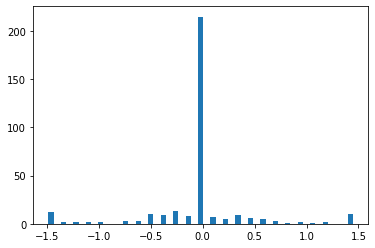

In [85]:
num_bins = 25
hist, bins = np.histogram(data['steering'], num_bins)
center = bins[:-1] + bins[1:] * 0.5  # center the bins to 0
plt.bar(center, hist, width=0.05)

<BarContainer object of 25 artists>

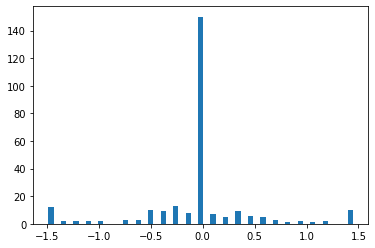

In [86]:
#remove extra points for balancing

remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
        steering_angle = data['steering'][i]
        if steering_angle >= bins[j] and steering_angle <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[150:]
    remove_list.extend(list_)

data.drop(data.index[remove_list], inplace=True)

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)

In [88]:
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

213 54


Text(0.5, 1.0, 'Val')

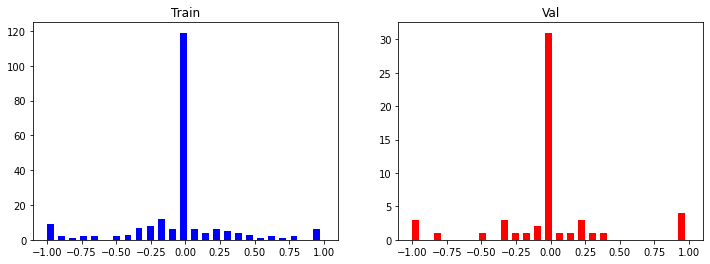

In [90]:
X_train, X_valid, Y_train, Y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=0)

print(len(X_train), len(X_valid))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(Y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Train')
axes[1].hist(Y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Val')

In [95]:
def img_preprocess(x):
    x = npimg.imread(x)
    x = x[50:145, :, :]
    x = cv2.cvtColor(x, cv2.COLOR_RGB2YUV)
    x = cv2.GaussianBlur(x, (3, 3), 0)
    x = cv2.resize(x, (100, 100))
    x = x / 255
    return x

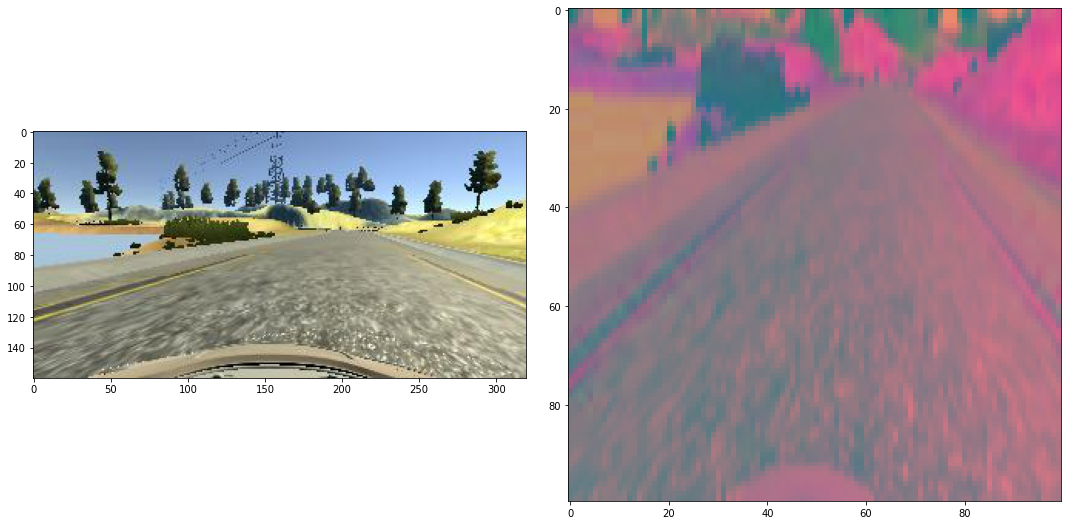

In [96]:
image = image_paths[228]
image_before = npimg.imread(image)
image_after = img_preprocess(image)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axes[0].imshow(image_before)
axes[1].imshow(image_after)

In [97]:
X_train_preprocessed = np.array(list(map(img_preprocess, X_train)))
X_valid_preprocessed = np.array(list(map(img_preprocess, X_valid)))

In [43]:
from keras.applications.resnet50 import ResNet50
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

94773248/94765736 [==============================] - 29s 0us/step


In [ ]:
for layer in resnet.layers[:-4]: 
    layer.trainable = False

In [57]:
def get_model():
    model = Sequential()
    model.add(resnet)

    model.add(Dropout(0.5))
  
    model.add(Flatten())
  
    model.add(Dense(100, activation='elu'))
    model.add(Dropout(0.5))
  
    model.add(Dense(50, activation='elu'))
    model.add(Dropout(0.5))
  
    model.add(Dense(10, activation='elu'))
    model.add(Dropout(0.5))
  
    model.add(Dense(1))
  
    optimizer = Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
model = get_model()


In [52]:
history = model.fit(
    X_train_preprocessed, 
    Y_train, 
    epochs=25, 
    validation_data=(X_valid_preprocessed, Y_valid),
    batch_size=256, 
    verbose=1, 
    shuffle=1)


Epoch 1/25
2/2 [==============================] - 38s 7s/step - loss: 9.1616 - accuracy: 0.3460 - val_loss: 0.9463 - val_accuracy: 0.0156
Epoch 2/25
2/2 [==============================] - 9s 5s/step - loss: 6.1809 - accuracy: 0.2678 - val_loss: 0.9836 - val_accuracy: 0.0156
Epoch 3/25
2/2 [==============================] - 10s 6s/step - loss: 3.8590 - accuracy: 0.2468 - val_loss: 1.0767 - val_accuracy: 0.0156
Epoch 4/25
2/2 [==============================] - 10s 6s/step - loss: 6.9936 - accuracy: 0.3255 - val_loss: 0.8413 - val_accuracy: 0.0156
Epoch 5/25
2/2 [==============================] - 10s 6s/step - loss: 2.9892 - accuracy: 0.2809 - val_loss: 0.5539 - val_accuracy: 0.0156
Epoch 6/25
2/2 [==============================] - 10s 6s/step - loss: 3.7717 - accuracy: 0.3177 - val_loss: 0.6251 - val_accuracy: 0.0156
Epoch 7/25
2/2 [==============================] - 10s 6s/step - loss: 2.9553 - accuracy: 0.3805 - val_loss: 0.6138 - val_accuracy: 0.0156
Epoch 8/25
2/2 [===================

Text(0.5, 0, 'Epoch')

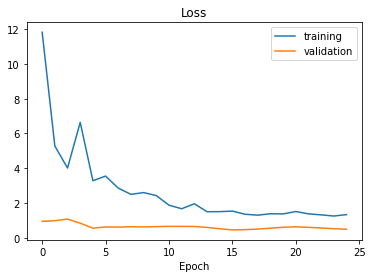

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [65]:
model.save_weights('model_self_driving.h5')